Importing all the Libraries to be used

In [3]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np

Importing the Dataset

In [16]:
data  =pd.read_csv("COVID_19_CASES.csv")
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,53984,54062,54141,54278,54403,54483,54559,54595,54672,54750,54854,54891,54939,55008,55023,55059,55121,55174,55231,55265,55330,55335,55359,55384,55402,55420,55445,55473,55492,55514,55518,55540,55557,55575,55580,55604,55617,55646,55664,55680
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,67690,67982,68568,69238,69916,70655,71441,72274,72812,73691,74567,75454,76350,77251,78127,78992,79934,80941,81993,83082,84212,85336,86289,87528,88671,89776,90835,91987,93075,93850,94651,95726,96838,97909,99062,100246,101285,102306,103327,104313
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,103833,104092,104341,104606,104852,105124,105369,105596,105854,106097,106359,106610,106887,107122,107339,107578,107841,108116,108381,108629,108629,109088,109313,109559,109782,110049,110303,110513,110711,110894,111069,111247,111418,111600,111764,111917,112094,112279,112461,112622
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9083,9083,9194,9308,9379,9416,9499,9549,9596,9638,9716,9779,9837,9885,9937,9972,10017,10070,10137,10172,10206,10251,10275,10312,10352,10391,10427,10463,10503,10538,10555,10583,10610,10645,10672,10699,10712,10739,10775,10799
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18875,18926,19011,19093,19177,19269,19367,19399,19476,19553,19580,19672,19723,19782,19796,19829,19900,19937,19996,20030,20062,20086,20112,20163,20210,20261,20294,20329,20366,20381,20389,20400,20452,20478,20499,20519,20548,20584,20640,20695


**Data Building, extracting only the Indian Covid-19 Cases and creating a DataFrame of it.**

Replacing the name of Country/Region by just Country

In [17]:
data.rename(columns = {'Country/Region':'Country'}, inplace = True)

In [18]:
data.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,53984,54062,54141,54278,54403,54483,54559,54595,54672,54750,54854,54891,54939,55008,55023,55059,55121,55174,55231,55265,55330,55335,55359,55384,55402,55420,55445,55473,55492,55514,55518,55540,55557,55575,55580,55604,55617,55646,55664,55680
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,67690,67982,68568,69238,69916,70655,71441,72274,72812,73691,74567,75454,76350,77251,78127,78992,79934,80941,81993,83082,84212,85336,86289,87528,88671,89776,90835,91987,93075,93850,94651,95726,96838,97909,99062,100246,101285,102306,103327,104313
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,103833,104092,104341,104606,104852,105124,105369,105596,105854,106097,106359,106610,106887,107122,107339,107578,107841,108116,108381,108629,108629,109088,109313,109559,109782,110049,110303,110513,110711,110894,111069,111247,111418,111600,111764,111917,112094,112279,112461,112622
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9083,9083,9194,9308,9379,9416,9499,9549,9596,9638,9716,9779,9837,9885,9937,9972,10017,10070,10137,10172,10206,10251,10275,10312,10352,10391,10427,10463,10503,10538,10555,10583,10610,10645,10672,10699,10712,10739,10775,10799
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18875,18926,19011,19093,19177,19269,19367,19399,19476,19553,19580,19672,19723,19782,19796,19829,19900,19937,19996,20030,20062,20086,20112,20163,20210,20261,20294,20329,20366,20381,20389,20400,20452,20478,20499,20519,20548,20584,20640,20695


Extracting out the India Covid Dataset Row

In [19]:
india_data = data[data['Country'] == 'India']

In [20]:
india_data

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21
146,NaN,India,20.593684,78.96288,0,0,0,0,0,0,0,0,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,10571773,10581823,10595639,10610883,10625428,10639684,10654533,10667736,10676838,10689527,10701193,10720048,10733130,10746174,10757610,10766245,10777284,10790183,10802591,10814304,10826363,10838194,10847304,10858371,10871294,10880603,10892746,10904940,10916589,10925710,10937320,10950201,10963394,10977387,10991651,11005850,11016434,11030176,11046914,11063491


In [21]:
india_data['1/20/21']

146    10610883
Name: 1/20/21, dtype: int64

Taking out the Date an cases and creating a list from it

In [135]:
Date = []
cases = []
for column in india_data:
  #print("Column : ", column)
  Date.append(column)
  cases.append(india_data[column])
  # print("Value :", india_data[column])

In [136]:
Date[:4], cases[:4]

(['Province/State', 'Country', 'Lat', 'Long'], [146    NaN
  Name: Province/State, dtype: object, 146    India
  Name: Country, dtype: object, 146    20.593684
  Name: Lat, dtype: float64, 146    78.96288
  Name: Long, dtype: float64])

Removing the first 4 values of List as they are of no Use

In [137]:
Date = Date[4:]
cases = cases[4:]

Extracting out the Numerical value of Cases from  the cases variable and

In [29]:
p = str(cases[0]).split(' ')[4]
int(p.split('\n')[0])

0

In total we have 397 days of values of COVID-CASES

In [30]:
Date[0], cases[0]
len(Date), len(cases)

(397, 397)

In [31]:
for i in range(len(cases)):
  p = str(cases[i]).split(' ')[4]
  cases[i] = int(p.split('\n')[0])

Creating the Dataframe for total 397 Cases

In [66]:
data = pd.DataFrame(data = [cases], index = ['Cases'] )
data = data.T
data.tail()

,Cases
392,11005850
393,11016434
394,11030176
395,11046914
396,11063491


In [67]:
data.shape

(397, 1)

Seeing the trend of increase in Covid-19 Cases throughout the 397 Day

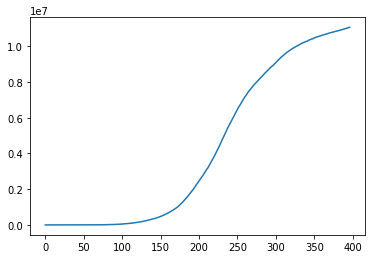

In [68]:
import matplotlib.pyplot as plt
plt.plot(data)

Preproceesing the dataset to minimize the COmputational Power

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data[:5]

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [9.03873832e-08]])

In [70]:
scaled_data.shape

(397, 1)

As it is a sequential Dataset, we cant shuffle the dataset randomly so I am making the first 357 day of dataset (about 90% of total days) as training dataset and rest as Testing Dataset

In [111]:
training_data, testing_data = scaled_data[:357], scaled_data[357:]
training_data.shape, testing_data.shape

((357, 1), (40, 1))

Creating a window for 7 days and predicting the out put on 8th day, so addding the first 7 days of window dataset to X_train and next 1 data to the y_train. Same procedure is done during Test classification as well.

In [112]:
X_train = []
y_train = []
X_test = []
y_test = []
time_stamp = 7
for i in range(len(training_data) - time_stamp - 1):
  X_train.append(training_data[i: i + time_stamp, 0])
  y_train.append(training_data[i+ time_stamp, 0])

for i in range(len(testing_data) - time_stamp - 1):
  X_test.append(testing_data[i: i + time_stamp, 0])
  y_test.append(testing_data[i+ time_stamp, 0])


SO the first 349 days of dataset is in X_train and rest are in X_Test for testing

In [113]:
len(X_train), len(X_test)

(349, 32)

In [114]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [115]:
X_train[0], y_train[0]

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        9.03873832e-08, 9.03873832e-08, 9.03873832e-08]),
 1.807747663011612e-07)

In [116]:
X_train.shape, X_test.shape

((349, 7), (32, 7))

Increasing the DImension of the X_train and X_test dataset for training the Model under LSTM

In [117]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [118]:
X_train.shape, X_test.shape

((349, 7, 1), (32, 7, 1))

Model Creating

In [125]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(120, return_sequences=True, input_shape = (7, 1)),
    tf.keras.layers.LSTM(60, return_sequences= True),
    tf.keras.layers.LSTM(30),
    tf.keras.layers.Dense(1)]
)
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 7, 120)            58560     
_________________________________________________________________
lstm_19 (LSTM)               (None, 7, 60)             43440     
_________________________________________________________________
lstm_20 (LSTM)               (None, 30)                10920     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 31        
Total params: 112,951
Trainable params: 112,951
Non-trainable params: 0
_________________________________________________________________


Model Compiling

In [126]:
model.compile(loss=tf.keras.losses.Huber(),
              optimizer = 'adam')
history = model.fit(X_train, y_train, epochs = 200, validation_data = (X_test, y_test))

Epoch 1/200
11/11 [==============================] - 4s 88ms/step - loss: 0.0810 - val_loss: 0.0025
Epoch 2/200
11/11 [==============================] - 0s 8ms/step - loss: 0.0140 - val_loss: 0.0248
Epoch 3/200
11/11 [==============================] - 0s 7ms/step - loss: 0.0041 - val_loss: 0.0082
Epoch 4/200
11/11 [==============================] - 0s 8ms/step - loss: 0.0011 - val_loss: 2.5174e-04
Epoch 5/200
11/11 [==============================] - 0s 7ms/step - loss: 3.1052e-04 - val_loss: 2.4191e-04
Epoch 6/200
11/11 [==============================] - 0s 8ms/step - loss: 2.2433e-04 - val_loss: 1.0941e-04
Epoch 7/200
11/11 [==============================] - 0s 8ms/step - loss: 9.6535e-05 - val_loss: 1.1928e-04
Epoch 8/200
11/11 [==============================] - 0s 8ms/step - loss: 4.6874e-05 - val_loss: 1.6992e-05
Epoch 9/200
11/11 [==============================] - 0s 9ms/step - loss: 3.0121e-05 - val_loss: 2.7049e-05
Epoch 10/200
11/11 [==============================] - 0s 9ms/ste

Predicting the training and Testing Model

In [145]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

COnverting them to its actual values

In [146]:
y_train = scaler.inverse_transform(np.array(y_train).reshape(-1, 1))
y_test = scaler.inverse_transform(np.array(y_test).reshape(-1, 1))

In [147]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

**Checking the Variation of both the y_train and trained y_predicted by plotting the graph of sequences**

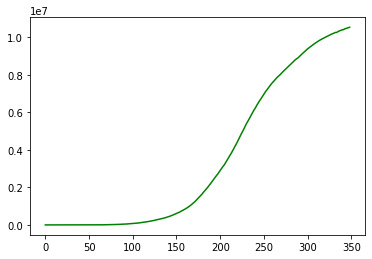

In [150]:
plt.plot(y_train, 'g')

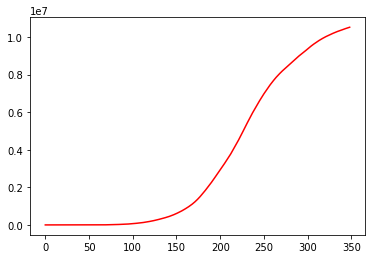

In [151]:
plt.plot(train_predict, 'r')

**It comes out the the y-Trained and y_predicted trained are almost similar**

**Checking the Variation of both the y_test and y_predicted by plotting the graph of sequences**

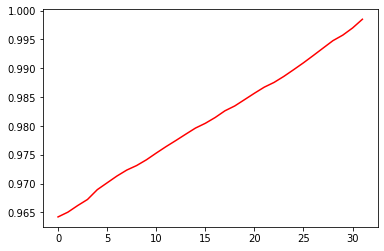

In [142]:
plt.plot(y_test, 'r')

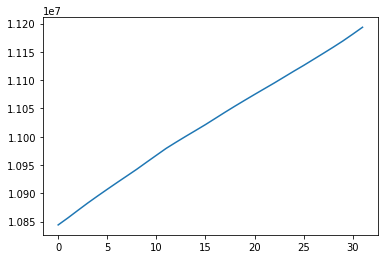

In [143]:
plt.plot(test_predict)

**It comes out the the y-test and y_predicted for test dataset are almost similar**